## Matplotlib fundamentals

In [1]:
import pandas as pd

df = pd.read_csv("data/norway_new_car_sales_by_make.csv")
df.head()

,Year,Month,Make,Quantity,Pct
0,2007,1,Toyota,2884,22.7
1,2007,1,Volkswagen,2521,19.9
2,2007,1,Peugeot,1029,8.1
3,2007,1,Ford,870,6.9
4,2007,1,Volvo,693,5.5


## EDA - exploratory data analysis

In [2]:
df.shape

(4377, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4377 entries, 0 to 4376
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      4377 non-null   int64  
 1   Month     4377 non-null   int64  
 2   Make      4367 non-null   object 
 3   Quantity  4377 non-null   int64  
 4   Pct       4377 non-null   float64
dtypes: float64(1), int64(3), object(1)
memory usage: 171.1+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,4377.0,2011.421065,2.906408,2007.0,2009.0,2011.0,2014.0,2017.0
Month,4377.0,6.459904,3.446815,1.0,3.0,6.0,9.0,12.0
Quantity,4377.0,307.802148,411.315021,1.0,14.0,153.0,461.0,3017.0
Pct,4377.0,2.762257,3.635185,0.0,0.1,1.4,4.2,22.7


In [37]:
#doing it in dataframe
df_quantity_brand = df.groupby('Make')['Quantity'].sum()
df_quantity_brand.sort_values(ascending=False)

Make
Volkswagen       206669
Toyota           168177
Volvo             99937
Ford              99713
BMW               73315
                  ...  
McLaren               1
Martin Motors         1
Koenigsegg            1
Infiniti              1
Westfield             1
Name: Quantity, Length: 65, dtype: int64

In [42]:
#doing it in sql via Duckdb
import duckdb

df_quantity_brand = duckdb.query("""
    SELECT make as make, SUM(quantity) as car_sold
    FROM df
    GROUP BY make
    ORDER BY car_sold DESC
""").df()

df_quantity_brand.head()

,make,car_sold
0,Volkswagen,206669.0
1,Toyota,168177.0
2,Volvo,99937.0
3,Ford,99713.0
4,BMW,73315.0


## Bar chart

<Axes: xlabel='make'>

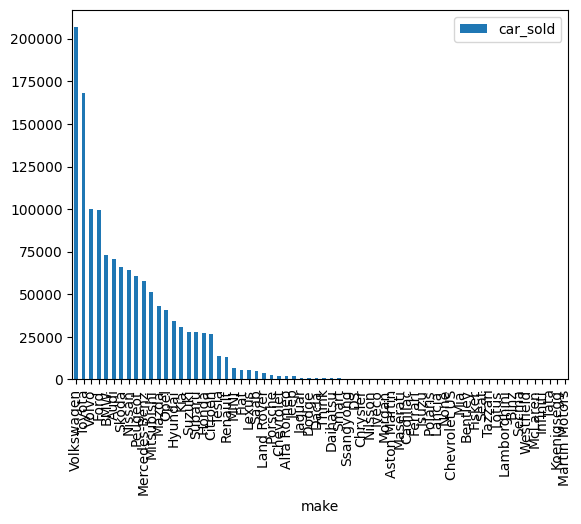

In [ ]:
df_quantity_brand.plot(kind="bar", x="make", y= "car_sold")


<Axes: xlabel='make'>

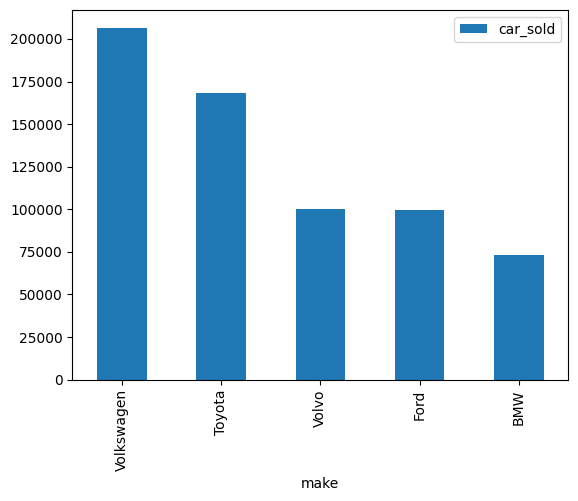

In [62]:
df_quantity_brand.iloc[:5].plot(kind="bar", x="make", y= "car_sold")


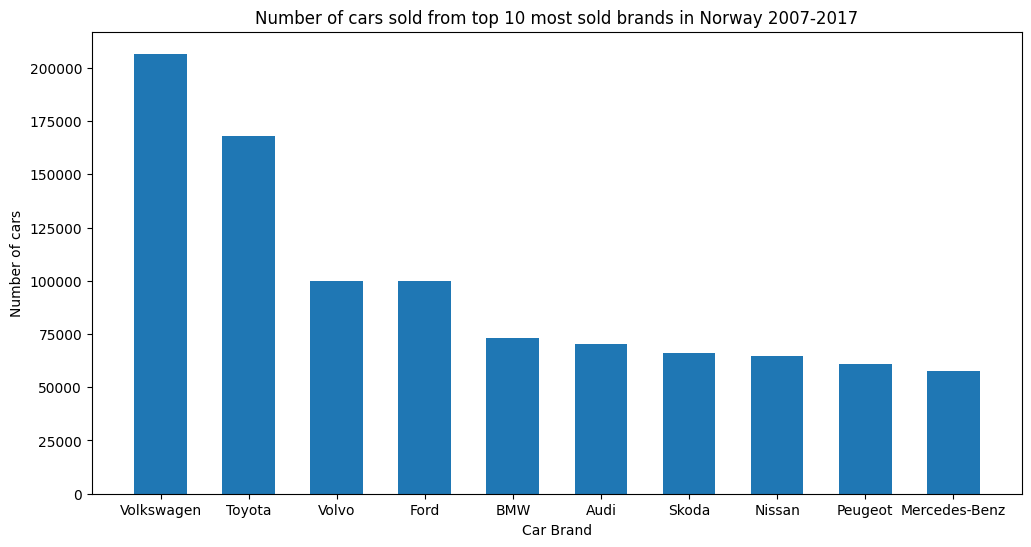

In [71]:
import matplotlib.pyplot as plt

df_quantity_brand_top10 = df_quantity_brand.iloc[:10]
fig, ax = plt.subplots(figsize = (12,6))
ax.bar(
    x= df_quantity_brand_top10["make"],
    height = df_quantity_brand_top10["car_sold"],
    width = .6
)
ax.set(title= "Number of cars sold from top 10 most sold brands in Norway 2007-2017", 
       xlabel="Car Brand", 
       ylabel="Number of cars")

fig.tight_layout
fig.savefig("figures/bars_cars_top10.png")

## Line chart

In [ ]:
df.

,Year,Month,Make,Quantity,Pct
0,2007,1,Toyota,2884,22.7
1,2007,1,Volkswagen,2521,19.9
2,2007,1,Peugeot,1029,8.1
3,2007,1,Ford,870,6.9
4,2007,1,Volvo,693,5.5
...,...,...,...,...,...
4372,2017,1,Nilsson,3,0.0
4373,2017,1,Maserati,2,0.0
4374,2017,1,Ferrari,1,0.0
4375,2017,1,Smart,1,0.0


In [ ]:
#group by year in dataframe
df_quantity_year = df.groupby('Year')['Quantity'].sum()
df_quantity_year

Year
2007    129195
2008    110617
2009     98675
2010    127754
2011    138345
2012    137967
2013    142151
2014    144202
2015    150686
2016    154603
2017     13055
Name: Quantity, dtype: int64

In [92]:
df_quantity_year = duckdb.query("""
    SELECT year, SUM(Quantity) as Quantity
    FROM df
    GROUP BY year
    ORDER BY year ASC;
""").df().set_index("Year")
df_quantity_year

,Quantity
Year,
2007,129195.0
2008,110617.0
2009,98675.0
2010,127754.0
2011,138345.0
2012,137967.0
2013,142151.0
2014,144202.0
2015,150686.0


<Axes: xlabel='Year'>

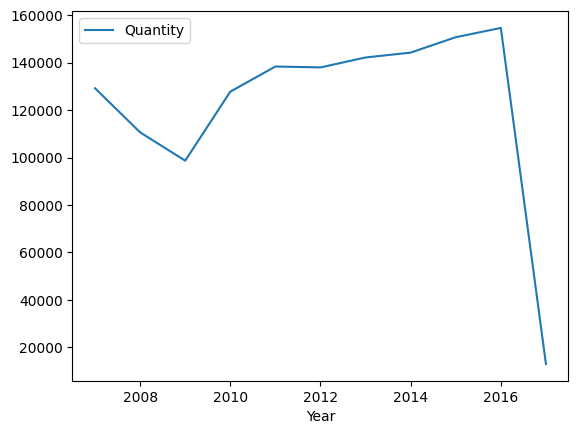

In [93]:
df_quantity_year.plot()

In [ ]:
# why 2017 so small
df.tail()
#only January in 2017

,Year,Month,Make,Quantity,Pct
4372,2017,1,Nilsson,3,0.0
4373,2017,1,Maserati,2,0.0
4374,2017,1,Ferrari,1,0.0
4375,2017,1,Smart,1,0.0
4376,2017,1,Ssangyong,1,0.0


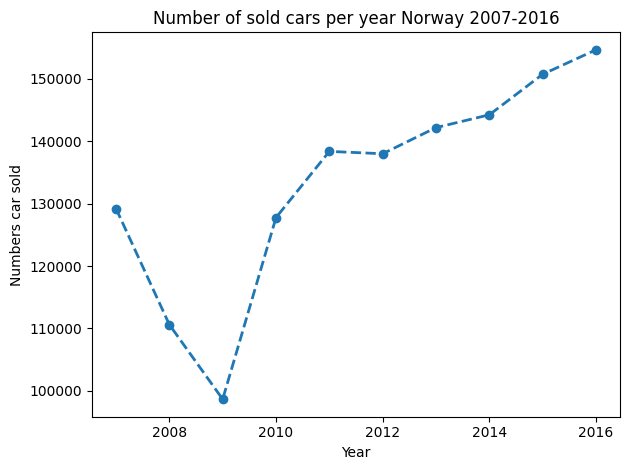

In [102]:
ax = df_quantity_year.iloc[:-1].plot(
    title="Number of sold cars per year Norway 2007-2016",
    xlabel="Year",
    ylabel="Numbers car sold",
    style= "--o",
    linewidth=2,
)
ax.legend().remove()
fig = ax.get_figure()
fig.tight_layout()
fig.savefig("figures/car_sales_yearly_line.png")
